# Requestion:
Construct a machine learning model to predict the gender based on the other 7 features. You are free to decide what type of model you use and what features should be included in your model. Show the classification report and choose what metrics you would use to assess the model (clearly explain your choice).

Since this is a classification problem under supervised learning, we can use the following algorithms:  
&ensp; 1. Neural Network  
&ensp; 2. Logistic Regression  
&ensp; 3. Random Forest  
&ensp; 4. Naive Bayes  
&ensp; 5. Support Vector Machine  
&ensp; 6. K-Nearest Neighbors (KNN)  
  
In this project, I will use 3 algorithms: KNN, Logistic Regression and Neural Network

## I. IMPORT LIBRARIES & DATA

In [178]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns
import tensorflow as tf

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report

from keras.layers import Dense
from keras.optimizers import SGD
from keras.models import Sequential
from keras.losses import CategoricalCrossentropy
from keras.utils import to_categorical

In [179]:
os.chdir(r'C:\Users\BAO HAN\Downloads')

In [180]:
train = pd.read_csv('train.csv')
train.head()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.5,0,0,0,0,Female
1,1,12.6,5.6,0,0,0,0,Female
2,0,13.0,6.5,1,1,1,1,Male
3,1,12.5,6.9,1,0,1,1,Male
4,1,13.7,6.1,0,0,1,0,Female


In [181]:
test = pd.read_csv('test.csv')
test.head()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,13.6,6.0,1,1,1,1,Male
1,1,12.0,6.1,0,0,0,0,Female
2,1,12.7,6.8,1,1,1,1,Male
3,0,12.0,5.1,0,0,0,0,Female
4,1,13.4,5.5,0,1,0,0,Female


## II. EDA (EXPLORY DATA ANALYSIS)

In [182]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2750 entries, 0 to 2749
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   long_hair                  2750 non-null   int64  
 1   forehead_width_cm          2750 non-null   float64
 2   forehead_height_cm         2750 non-null   float64
 3   nose_wide                  2750 non-null   int64  
 4   nose_long                  2750 non-null   int64  
 5   lips_thin                  2750 non-null   int64  
 6   distance_nose_to_lip_long  2750 non-null   int64  
 7   gender                     2750 non-null   object 
dtypes: float64(2), int64(5), object(1)
memory usage: 172.0+ KB


In [183]:
train.describe()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long
count,2750.000000,2750.000000,2750.000000,2750.000000,2750.000000,2750.000000,2750.000000
mean,0.866545,13.178473,5.943055,0.497455,0.514182,0.502182,0.509818
std,0.340127,1.100793,0.540476,0.500084,0.499890,0.500086,0.499995
min,0.000000,11.400000,5.100000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,12.200000,5.500000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,13.100000,5.900000,0.000000,1.000000,1.000000,1.000000
75%,1.000000,14.000000,6.300000,1.000000,1.000000,1.000000,1.000000
max,1.000000,15.500000,7.100000,1.000000,1.000000,1.000000,1.000000


In [184]:
train.isnull().sum()

long_hair                    0
forehead_width_cm            0
forehead_height_cm           0
nose_wide                    0
nose_long                    0
lips_thin                    0
distance_nose_to_lip_long    0
gender                       0
dtype: int64

In [185]:
train['gender'].value_counts()

gender
Male      1396
Female    1354
Name: count, dtype: int64

### 1. Histogram

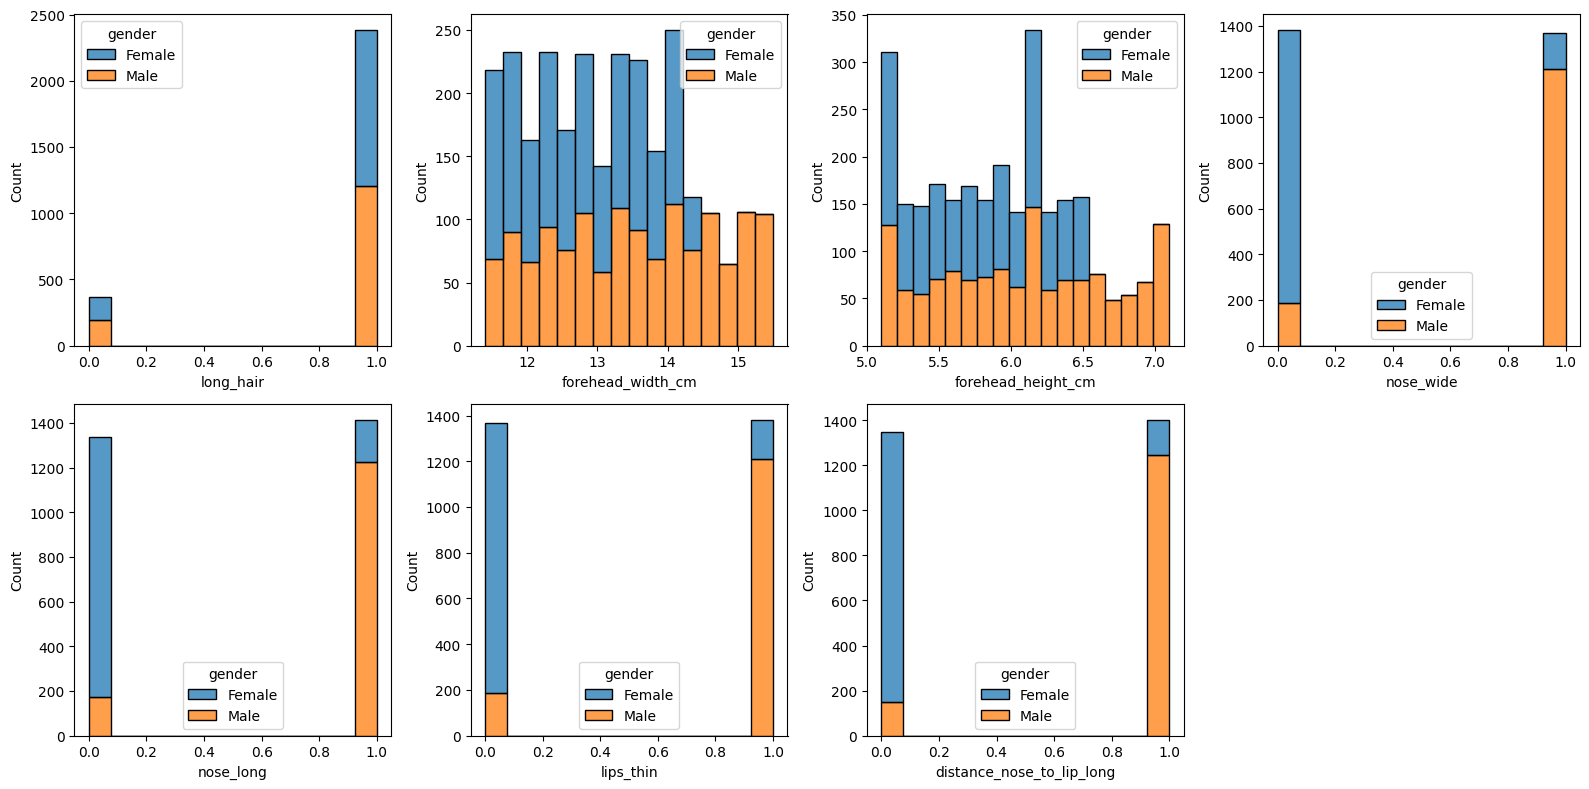

In [186]:
fig, axs = plt.subplots(2, 4, figsize = (16, 8)) # 2 rows, 4 columns
sns.histplot(data = train, x = 'long_hair', hue = 'gender', multiple = 'stack', ax = axs[0, 0])
sns.histplot(data = train, x = 'forehead_width_cm', hue = 'gender', multiple = 'stack', ax = axs[0, 1])
sns.histplot(data = train, x = 'forehead_height_cm', hue = 'gender', multiple = 'stack', ax = axs[0, 2])
sns.histplot(data = train, x = 'nose_wide', hue = 'gender', multiple = 'stack', ax = axs[0, 3])
sns.histplot(data = train, x = 'nose_long', hue = 'gender', multiple = 'stack', ax = axs[1, 0])
sns.histplot(data = train, x = 'lips_thin', hue = 'gender', multiple = 'stack', ax = axs[1, 1])
sns.histplot(data = train, x = 'distance_nose_to_lip_long', hue = 'gender', multiple = 'stack', ax = axs[1, 2])
fig.delaxes(axs[1, 3]) # blank
plt.tight_layout()
plt.show()

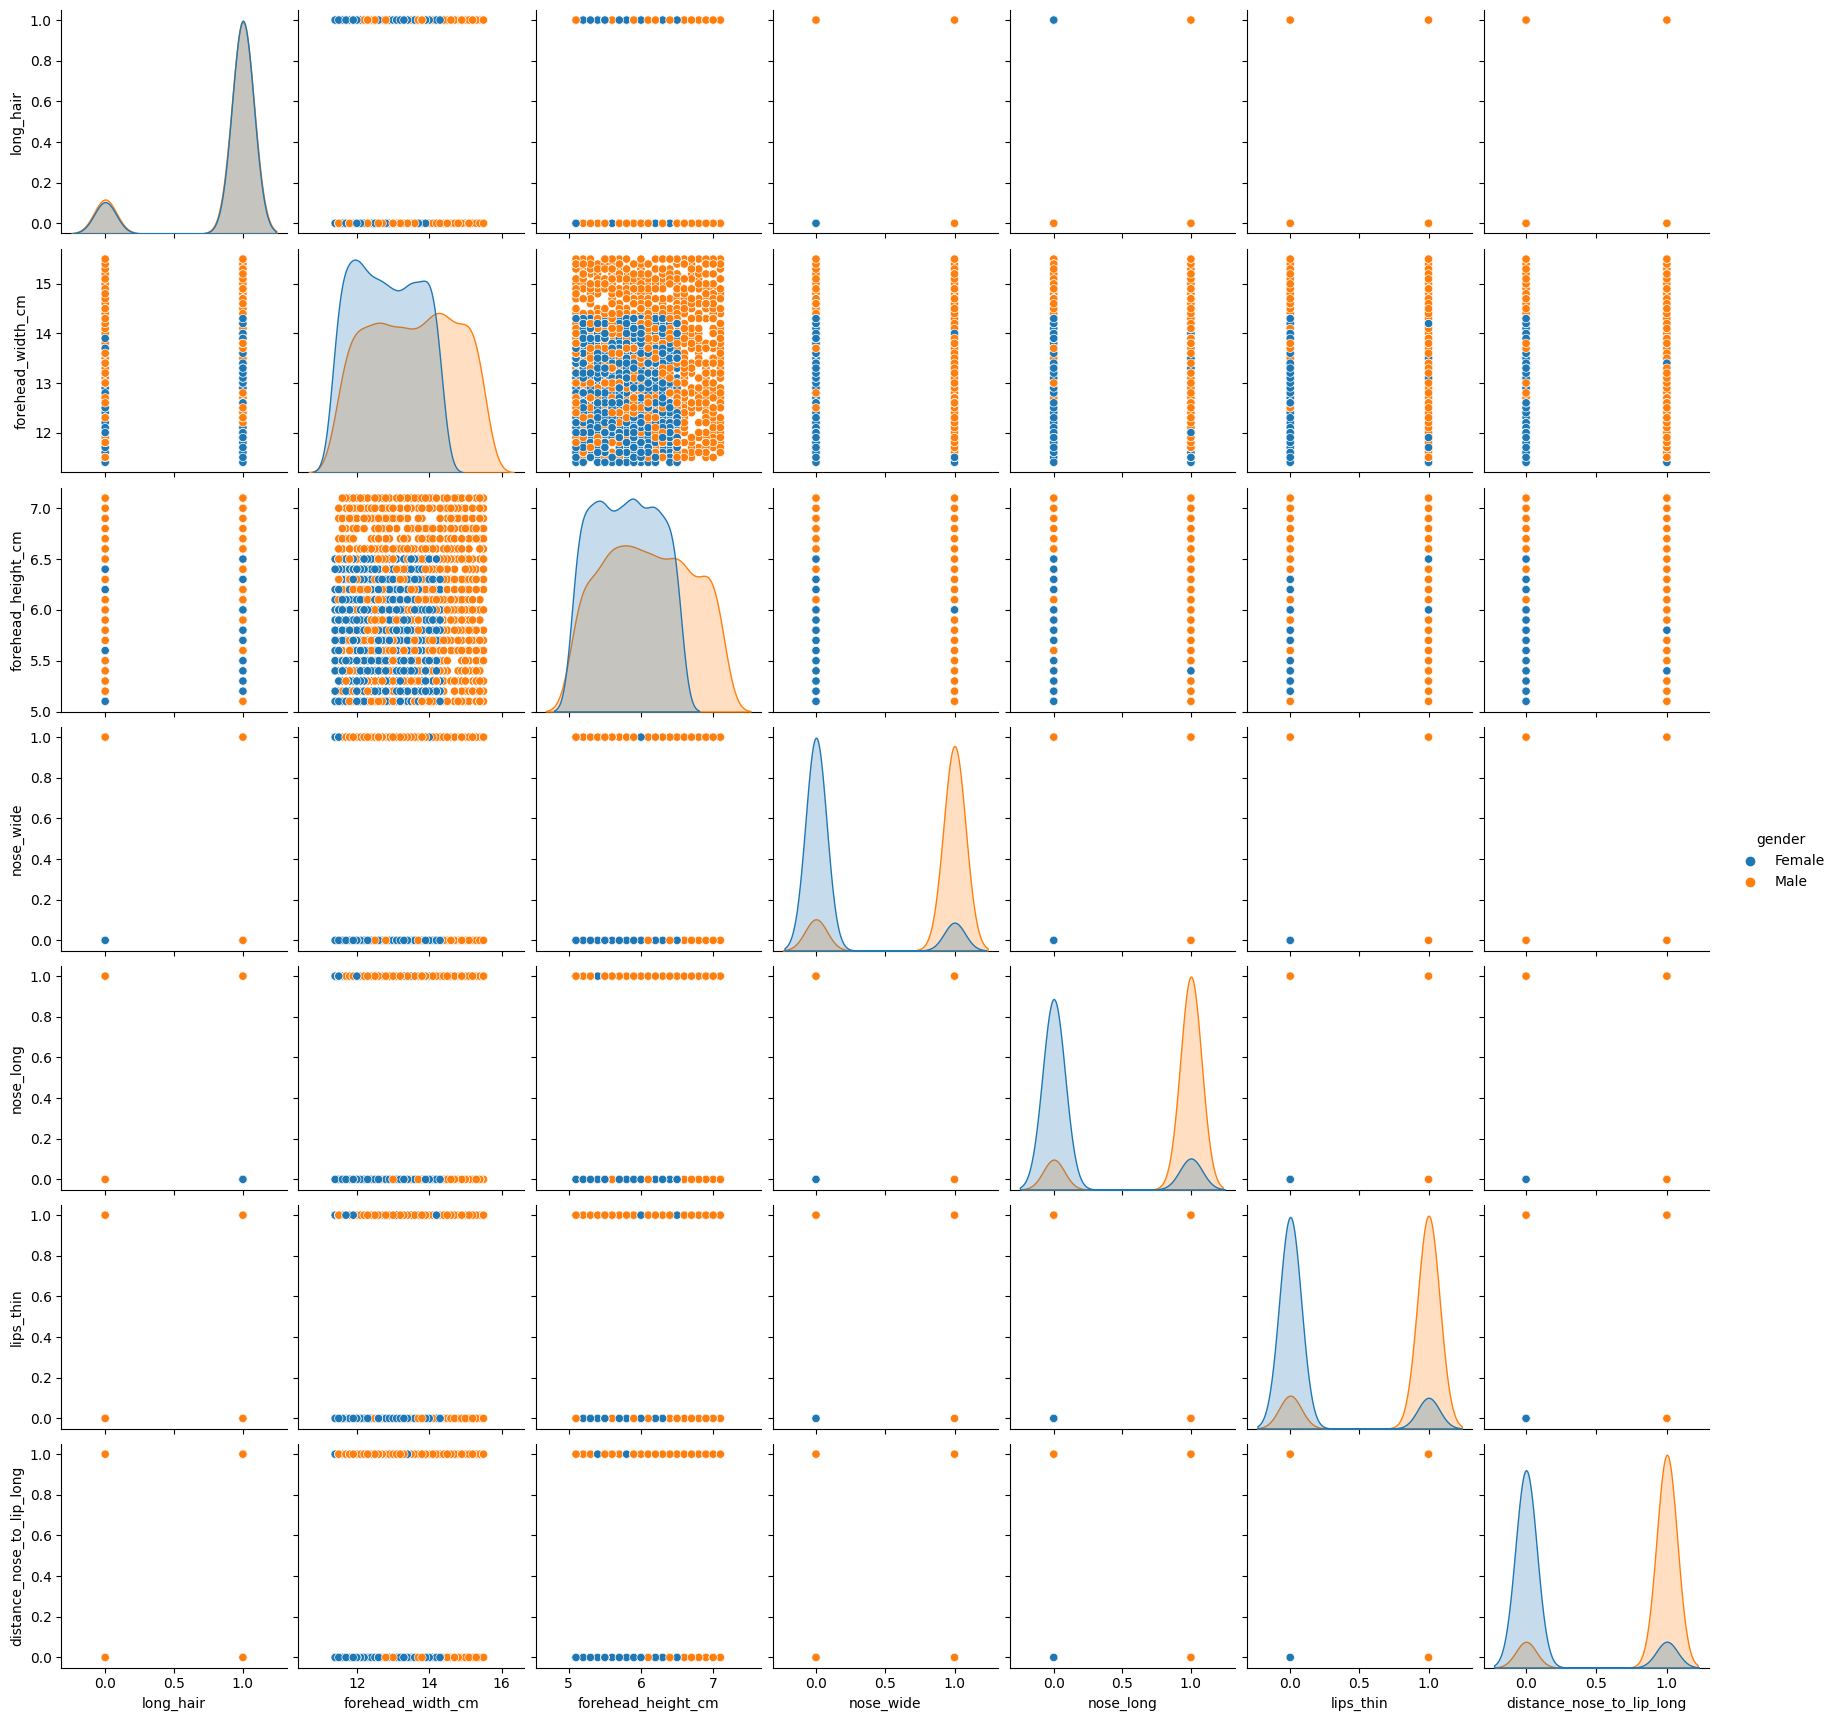

In [187]:
sns.pairplot(train, hue = 'gender')
plt.show()

### 2. Encoding

In [188]:
gender_list = []
for gender in train['gender']:
    if gender == 'Male':
        gender_list.append(0)
    else:
        gender_list.append(1)
train['Gender'] = gender_list
train

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender,Gender
0,1,11.8,6.5,0,0,0,0,Female,1
1,1,12.6,5.6,0,0,0,0,Female,1
2,0,13.0,6.5,1,1,1,1,Male,0
3,1,12.5,6.9,1,0,1,1,Male,0
4,1,13.7,6.1,0,0,1,0,Female,1
...,...,...,...,...,...,...,...,...,...
2745,1,15.2,5.9,1,1,0,1,Male,0
2746,1,12.8,6.4,0,1,1,0,Male,0
2747,0,14.5,6.6,1,1,1,1,Male,0
2748,1,14.9,6.7,1,1,1,1,Male,0


In [189]:
gender_list = []
for gender in test['gender']:
    if gender == 'Male':
        gender_list.append(0)
    else:
        gender_list.append(1)
test['Gender'] = gender_list
test

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender,Gender
0,1,13.6,6.0,1,1,1,1,Male,0
1,1,12.0,6.1,0,0,0,0,Female,1
2,1,12.7,6.8,1,1,1,1,Male,0
3,0,12.0,5.1,0,0,0,0,Female,1
4,1,13.4,5.5,0,1,0,0,Female,1
...,...,...,...,...,...,...,...,...,...
2246,1,13.7,5.5,1,1,1,0,Male,0
2247,1,13.7,7.1,1,1,1,1,Male,0
2248,1,13.3,5.1,0,0,0,0,Female,1
2249,1,14.6,6.5,1,1,0,1,Male,0


## III. DATA PROCESSING

In [190]:
train_drop = train.drop('gender', axis = 1)
test_drop = test.drop('gender', axis = 1)

In [191]:
normalized_train = (train_drop - train_drop.min()) / (train_drop.max() - train_drop.min())
normalized_test = (test_drop - test_drop.min()) / (test_drop.max() - test_drop.min())

In [192]:
normalized_train

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,Gender
0,1.0,0.097561,0.70,0.0,0.0,0.0,0.0,1.0
1,1.0,0.292683,0.25,0.0,0.0,0.0,0.0,1.0
2,0.0,0.390244,0.70,1.0,1.0,1.0,1.0,0.0
3,1.0,0.268293,0.90,1.0,0.0,1.0,1.0,0.0
4,1.0,0.560976,0.50,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...
2745,1.0,0.926829,0.40,1.0,1.0,0.0,1.0,0.0
2746,1.0,0.341463,0.65,0.0,1.0,1.0,0.0,0.0
2747,0.0,0.756098,0.75,1.0,1.0,1.0,1.0,0.0
2748,1.0,0.853659,0.80,1.0,1.0,1.0,1.0,0.0


In [193]:
normalized_train.describe()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,Gender
count,2750.000000,2750.000000,2750.000000,2750.000000,2750.000000,2750.000000,2750.000000,2750.000000
mean,0.866545,0.433774,0.421527,0.497455,0.514182,0.502182,0.509818,0.492364
std,0.340127,0.268486,0.270238,0.500084,0.499890,0.500086,0.499995,0.500033
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.195122,0.200000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.414634,0.400000,0.000000,1.000000,1.000000,1.000000,0.000000
75%,1.000000,0.634146,0.600000,1.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## IV. CORRELATION MATRIX

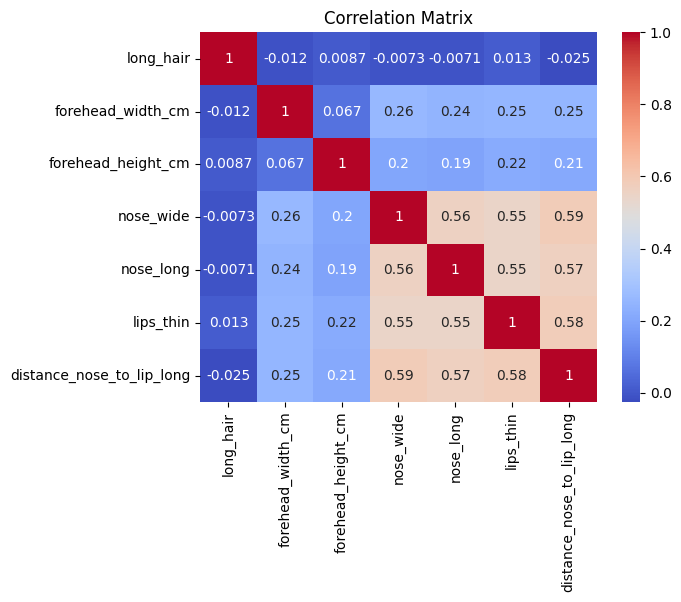

In [194]:
corr_matrix = normalized_train.iloc[:,0:7].corr()
sns.heatmap(corr_matrix, annot = True, cmap = 'coolwarm')
plt.title('Correlation Matrix')
plt.show()

# V. Modelling

In [195]:
X_train = normalized_train.drop('Gender', axis = 1)
y_train = normalized_train['Gender']
X_test = normalized_test.drop('Gender', axis = 1)
y_test = normalized_test['Gender']

### 1. KNN

In [196]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [197]:
y_pred_knn = knn.predict(X_test)
y_pred_knn

array([0., 1., 0., ..., 1., 0., 1.])

In [198]:
def knn_stat(y_test, y_pred_knn):
  print('Accuracy: ', metrics.accuracy_score(y_test, y_pred_knn))
  print('Precision: ', metrics.precision_score(y_test, y_pred_knn))
  print('Recall: ', metrics.recall_score(y_test, y_pred_knn))

knn_stat(y_test, y_pred_knn)

Accuracy:  0.965792980897379
Precision:  0.9588336192109777
Recall:  0.974716652136007


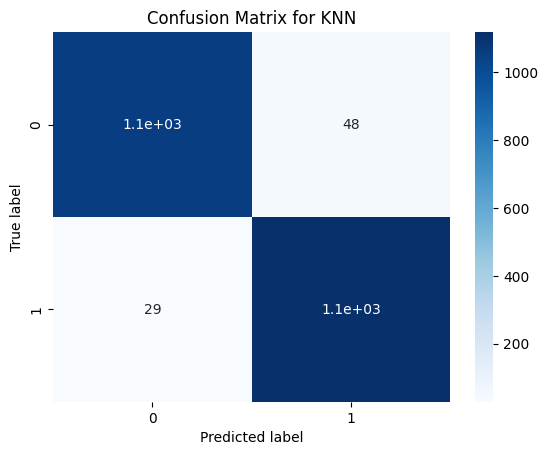

In [199]:
knn_cm = metrics.confusion_matrix(y_test, y_pred_knn)
sns.heatmap(knn_cm, annot = True, cmap = 'Blues')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for KNN')
plt.show()

### 2. Logistic Regresion

In [200]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [201]:
y_pred_log = logreg.predict(X_test)
y_pred_log

array([0., 1., 0., ..., 1., 0., 1.])

In [202]:
def logreg_stat(y_test, y_pred_log):
  print('Accuracy: ', metrics.accuracy_score(y_test, y_pred_log))
  print('Precision: ', metrics.precision_score(y_test, y_pred_log))
  print('Recall: ', metrics.recall_score(y_test, y_pred_log))
  
logreg_stat(y_test, y_pred_log)

Accuracy:  0.9689027099067081
Precision:  0.9703056768558952
Recall:  0.9686137750653879


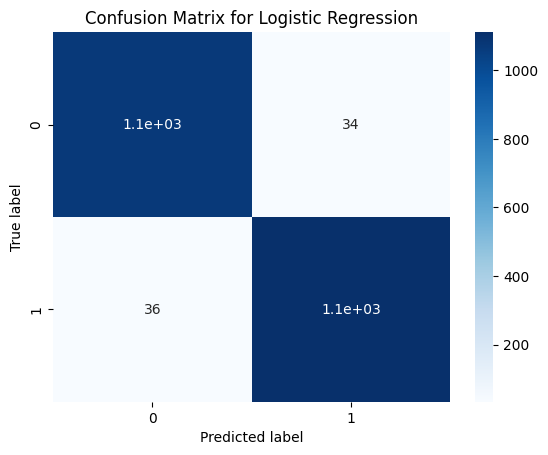

In [203]:
logreg_cm = metrics.confusion_matrix(y_test, y_pred_log)
sns.heatmap(logreg_cm, annot = True, cmap = 'Blues')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Logistic Regression')
plt.show()

### 3. Neural Network

In [270]:
def create_model():
    neural_network = Sequential([
        Dense(units = 32, input_dim = 7, activation = 'relu'),
        Dense(units = 2, activation = 'softmax')
    ])
    return neural_network

In [271]:
neural_network = create_model()
neural_network.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_22 (Dense)            (None, 32)                256       
                                                                 
 dense_23 (Dense)            (None, 2)                 66        
                                                                 
Total params: 322
Trainable params: 322
Non-trainable params: 0
_________________________________________________________________


#### Optimizer

In [272]:
neural_network.compile(loss = CategoricalCrossentropy(), optimizer = SGD(learning_rate = 0.05))

In [273]:
onehot_list  = []
for gender_ in normalized_train['Gender']:
    if gender_ == 0:
        onehot_list.append([1,0])
    else:
        onehot_list.append([0,1])
normalized_train['onehot'] = onehot_list

onehot_list  = []
for gender_ in normalized_test['Gender']:
    if gender_ == 0:
        onehot_list.append([1,0])
    else:
        onehot_list.append([0,1])
normalized_test['onehot'] = onehot_list

In [274]:
X_train = normalized_train.drop(['onehot', 'Gender'], axis = 1)
y_train = normalized_train['onehot']
X_test = normalized_test.drop(['onehot', 'Gender'], axis = 1)
y_test = normalized_test['onehot']

In [275]:
y_train_list = y_train.tolist()
y_test_list = y_test.tolist()

In [276]:
y_train_tensor = tf.convert_to_tensor(y_train_list)
y_test_tensor = tf.convert_to_tensor(y_test_list)

In [282]:
neural_network.fit(
    x = X_train,
    y = y_train_tensor,
    batch_size = 55,
    epochs = 200
)

Epoch 1/200
50/50 [==============================] - 0s 2ms/step - loss: 0.0777
Epoch 2/200
50/50 [==============================] - 0s 2ms/step - loss: 0.0779
Epoch 3/200
50/50 [==============================] - 0s 1ms/step - loss: 0.0776
Epoch 4/200
50/50 [==============================] - 0s 1ms/step - loss: 0.0775
Epoch 5/200
50/50 [==============================] - 0s 1ms/step - loss: 0.0776
Epoch 6/200
50/50 [==============================] - 0s 1ms/step - loss: 0.0776
Epoch 7/200
50/50 [==============================] - 0s 1ms/step - loss: 0.0774
Epoch 8/200
50/50 [==============================] - 0s 1ms/step - loss: 0.0775
Epoch 9/200
50/50 [==============================] - 0s 1ms/step - loss: 0.0777
Epoch 10/200
50/50 [==============================] - 0s 2ms/step - loss: 0.0773
Epoch 11/200
50/50 [==============================] - 0s 2ms/step - loss: 0.0774
Epoch 12/200
50/50 [==============================] - 0s 2ms/step - loss: 0.0774
Epoch 13/200
50/50 [=================

In [283]:
y_pred_neu = neural_network.predict(X_test)
y_pred_neu

71/71 [==============================] - 0s 1ms/step


array([[9.9985015e-01, 1.4978611e-04],
       [5.5011484e-04, 9.9944991e-01],
       [9.9989474e-01, 1.0522729e-04],
       ...,
       [5.2591012e-04, 9.9947411e-01],
       [9.9746549e-01, 2.5345425e-03],
       [1.9392509e-02, 9.8060751e-01]], dtype=float32)

In [284]:
y_pred_neu = np.argmax(y_pred_neu, axis = 1)
y_pred_neu

array([0, 1, 0, ..., 1, 0, 1], dtype=int64)

In [285]:
y_label = []
for y in y_test_list:
    if y == [1,0]:
        y_label.append(0)
    else:
        y_label.append(1)
y_label

[0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,


In [286]:
print(classification_report(y_pred_neu, y_label))

              precision    recall  f1-score   support

           0       0.98      0.96      0.97      1123
           1       0.96      0.98      0.97      1128

    accuracy                           0.97      2251
   macro avg       0.97      0.97      0.97      2251
weighted avg       0.97      0.97      0.97      2251

